In [2]:
import os
import sys
sys.path.append(os.path.abspath('../'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import neural_lam.utils as utils
from neural_lam.constants import ERA5UKConstants

In [10]:
0.78 * (1 - 0.37) + (0.7 * 0.5 + 0.6 * 0.5) * 0.37

0.7319

## Time Resolution Results

In [3]:
def load_rmse(path):
    rmse = np.loadtxt(path, delimiter=',').T
    print("Loaded RMSE from", path)
    print(rmse.shape)
    return rmse

step_1_rmse = load_rmse("../wandb/offline-run-20240607_233313-15gl53gn/files/test_rmse.csv")
step_2_rmse = load_rmse("../wandb/offline-run-20240608_015115-cn21mjx7/files/test_rmse.csv")
step_4_rmse = load_rmse("../wandb/offline-run-20240608_020323-q8pr3ftl/files/test_rmse.csv")

time_attention_3_rmse = load_rmse("../wandb/offline-run-20240609_205759-29hhe3jz/files/test_rmse.csv")
time_attention_2_rmse = load_rmse("../wandb/offline-run-20240610_023828-awjp35v1/files/test_rmse.csv")

Loaded RMSE from ../wandb/offline-run-20240607_233313-15gl53gn/files/test_rmse.csv
(48, 28)
Loaded RMSE from ../wandb/offline-run-20240608_015115-cn21mjx7/files/test_rmse.csv
(48, 28)
Loaded RMSE from ../wandb/offline-run-20240608_020323-q8pr3ftl/files/test_rmse.csv
(48, 28)
Loaded RMSE from ../wandb/offline-run-20240609_205759-29hhe3jz/files/test_rmse.csv
(48, 28)
Loaded RMSE from ../wandb/offline-run-20240610_023828-awjp35v1/files/test_rmse.csv
(48, 28)


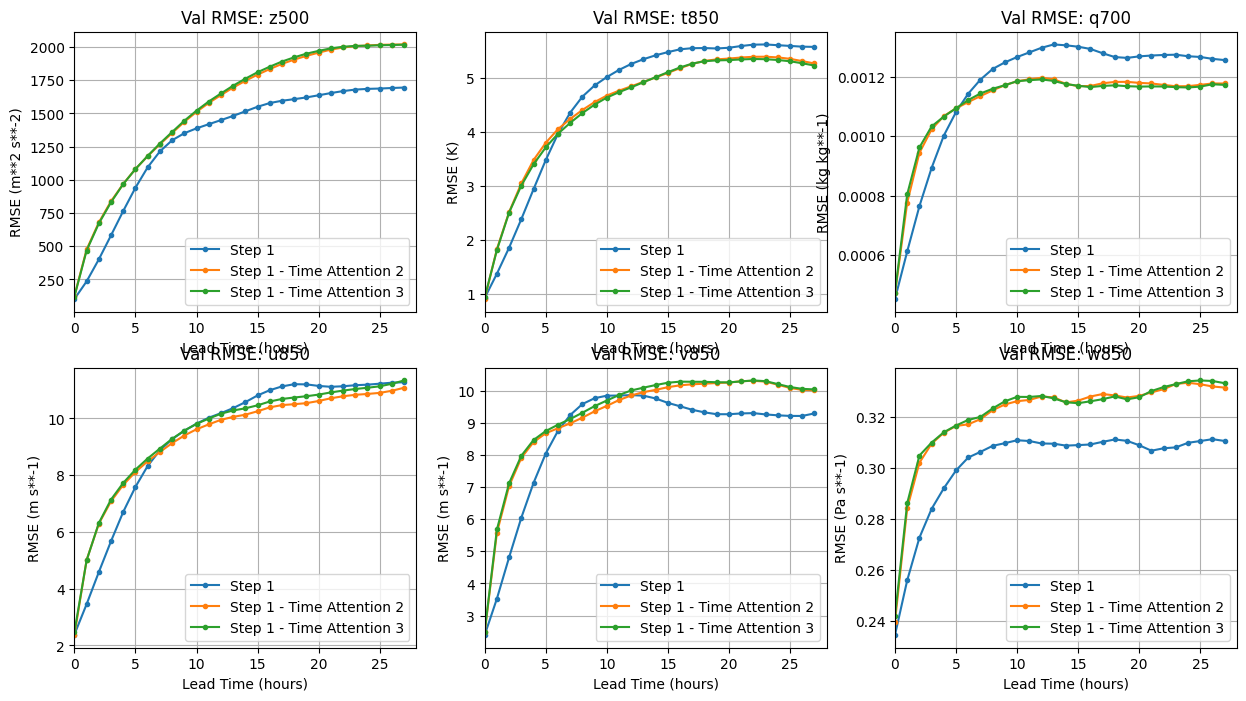

In [4]:
headline_vars = ["z500", "t850", "q700", "u850", "v850", "w850"]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
def rollout_axs_steps(ax, var_name):
    var_idx = ERA5UKConstants.PARAM_NAMES.index(var_name)
    var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]

    step_1_x = np.arange(step_1_rmse.shape[1])
    ax.plot(step_1_x, step_1_rmse[var_idx], ".-", label="Step 1")
    ax.plot(step_1_x, time_attention_2_rmse[var_idx], ".-", label="Step 1 - Time Attention 2")
    ax.plot(step_1_x, time_attention_3_rmse[var_idx], ".-", label="Step 1 - Time Attention 3")

    step_2_x = np.arange(step_2_rmse.shape[1]) * 2
    # ax.plot(step_2_x, step_2_rmse[var_idx], ".-", label="Step 2")

    step_4_x = np.arange(step_4_rmse.shape[1]) * 4
    # ax.plot(step_4_x, step_4_rmse[var_idx], ".-", label="Step 4")

    # # Set the x-axis limit
    ax.set_xlim(0, len(step_1_x))

    ax.legend()
    ax.set_xlabel("Lead Time (hours)")
    ax.set_ylabel(f"RMSE ({var_unit})")
    ax.set_title(f"Val RMSE: {var_name}")
    ax.grid(True)

for ax, var_name in zip(axs.flat, headline_vars):
    rollout_axs_steps(ax, var_name)

## Multi Resolution Results

In [ ]:
def load_single_level_rmse(path):
    # eval on entire uk
    csv_path = f".{path}/files/test_rmse.csv"
    rmse = np.loadtxt(csv_path, delimiter=',').T
    # print(rmse.shape)
    return rmse

def load_space_attention_rmse(path):
    level_1_rmse_path = f".{path}/files/level-1_test_rmse.csv"
    level_1_rmse = np.loadtxt(level_1_rmse_path, delimiter=",").T
    # print(level_1_rmse.shape)

    level_0_rmse_path = f".{path}/files/level-0_test_rmse.csv"
    level_0_rmse = np.loadtxt(level_0_rmse_path, delimiter=",").T
    # print(level_0_rmse.shape)
    
    return level_0_rmse, level_1_rmse

In [ ]:
# uk big - rmse on whole area
path = "./wandb/offline-run-20240610_010047-npn0p4yn"
uk_big_rmse = load_single_level_rmse(path)

# uk big - rmse on settlements only (local area)
# graph_lam-4x64-06_07_23-8758
path = "./wandb/offline-run-20240610_010047-bbjp9w1x"
uk_big_local_rmse = load_single_level_rmse(path)

# uk max - rmse on whole area
path = "./wandb/offline-run-20240609_231007-pj98hu90"
uk_max_rmse = load_single_level_rmse(path)

# uk max 
# graph_lam-4x64-06_07_02-4091
path = "./wandb/offline-run-20240611_015619-ixygkxie"
uk_max_local_rmse = load_single_level_rmse(path)

# uk small big space attention 
# results from training checkpoint
# "commit": "97d5b172b469bdf162025df905127d3d75663200"
path = "./wandb/offline-run-20240607_032059-w4yi6ek4"
_, uk_small_big_level_1_rmse_train_bad = load_space_attention_rmse(path)

# graph_lam-4x64-06_06_03-7248
# trained from "./wandb/offline-run-20240606_030547-whycevkt"
# results from min val checkpoint
# commit: f18b62b377febb49b0b6e6ce358782bc09090ca9
path = "./wandb/offline-run-20240606_232655-9larn97f"
uk_small_big_level_0_rmse, uk_small_big_level_1_rmse = load_space_attention_rmse(path)

path = "./wandb/offline-run-20240610_210719-rk5sqmup"
_, repro_uk_small_big_level_1_rmse = load_space_attention_rmse(path)

path = "./wandb/offline-run-20240610_150834-9o7ukrzp"
_, repro_v1_uk_small_big_level_1_rmse = load_space_attention_rmse(path)

path = "./wandb/offline-run-20240611_011729-zt9fevxc"
_, repro_v3_uk_small_big_level_1_rmse = load_space_attention_rmse(path)

path = "./wandb/offline-run-20240610_213742-1m39szm3"
_, uk_small_big_level_1_layer_norm_rmse = load_space_attention_rmse(path)


# path = "./wandb/offline-run-20240607_032004-jsphwhvf"
# _, uk_small_big_v2_level_1_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240607_033537-ghutnlwk"
# uk_small_max_level_0_rmse, uk_small_max_level_1_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240607_033812-4uiaele1"
# uk_small_max_v2_level_0_rmse, uk_small_max_v2_level_1_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240607_004950-3yc77trn"
# uk_local_ar_8_rmse = load_single_level_rmse(path)

# path = "./wandb/offline-run-20240609_205859-e18iuu7m"
# _, multi_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240609_210158-0wr7isjf"
# _, resid_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240609_210158-cqoyello"
# _, att_first_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240609_210529-b705dyvm"
# _, resid_att_first_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240610_022656-189fmoyz"
# _, v1_multi_rmse = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240610_022856-1g5wx1zk"
# _, v1_multi_rmse_resid = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240610_022857-kvqeou88"
# _, v1_multi_rmse_att = load_space_attention_rmse(path)

# path = "./wandb/offline-run-20240610_022857-wpgrdxu4"
# _, v1_multi_rmse_resid_att = load_space_attention_rmse(path)

In [ ]:
print(np.mean(uk_big_rmse))
print(np.mean(uk_max_rmse))
print(np.mean(uk_big_local_rmse))
print(np.mean(uk_max_local_rmse))
print()

print(np.mean(uk_small_big_level_1_rmse))
print(np.mean(repro_uk_small_big_level_1_rmse))
print(np.mean(repro_v1_uk_small_big_level_1_rmse))
print(np.mean(repro_v3_uk_small_big_level_1_rmse))
print(np.mean(uk_small_big_level_1_layer_norm_rmse))

204.2475491709842
202.68599236975155
209.33884874976388
202.68599236975155

211.5694146720752
210.28689008449996
292.44271179961953
211.5694146545378
257.41375876778034


In [1]:
def rollout_axs(ax, var_name):
    var_idx = ERA5UKConstants.PARAM_NAMES.index(var_name)
    var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]
    
    ax.plot(uk_max_rmse[var_idx], ".-", label="UK Max")
    ax.plot(uk_max_local_rmse[var_idx], ".-", label="UK Max Local")
    
    if var_name in ERA5UKConstants.CLIMATOLOGY:
        var_clim = ERA5UKConstants.CLIMATOLOGY[var_name]
        ax.axhline(var_clim, color="grey", linestyle="--", label="Climatology")

    xticks_pos = range(0, uk_big_local_rmse.shape[1], 2)
    xticks_labels = [str((tick + 1) * 6) for tick in xticks_pos]
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(xticks_labels)

    ax.legend()
    ax.set_xlabel("Lead Time (hours)")
    ax.set_ylabel(f"RMSE ({var_unit})")
    ax.set_title(f"Val RMSE: {var_name}")
    ax.grid(True)
    
# headline_vars = ["z500", "t850", "q700", "u850", "v850", "w850"]
headline_vars = ["z500", "t850", "q700", "u850", "v850", "w850"]


fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for ax, var_name in zip(axs.flat, headline_vars):
    rollout_axs(ax, var_name)
    

NameError: name 'plt' is not defined

## Plotting z on all levels

Text(0, 0.5, 'RMSE (m**2 s**-2)')

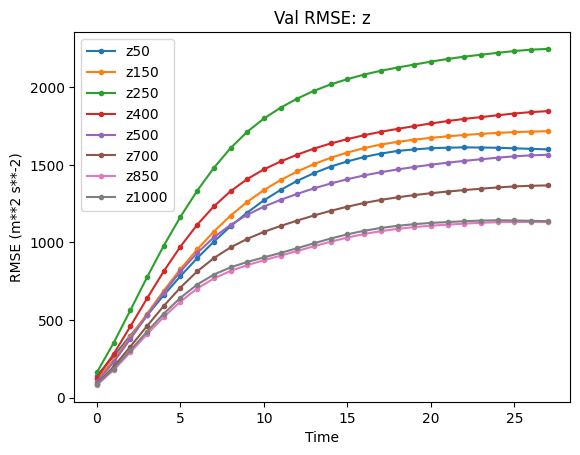

In [40]:
fig, ax = plt.subplots()
var_idx = 0
var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]

ax.set_title(f"Val RMSE: z")

for var_idx in range(8):
    var_name = ERA5UKConstants.PARAM_NAMES[var_idx]
    ax.plot(val_rmse[var_idx], ".-", label=var_name)
    
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel(f"RMSE ({var_unit})")

# Time comparison

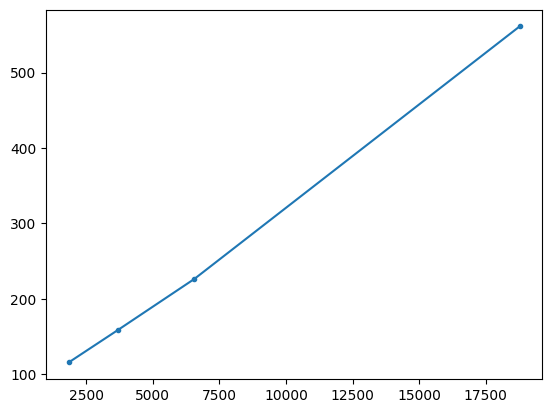

In [23]:
def num_grid_nodes(dataset):
    grid = np.load(f"../data/{dataset}/static/nwp_xy.npy")
    return grid.shape[1] * grid.shape[2]

times = np.array([115.381, 158.821, 226.244, 561.162])
uk_small = num_grid_nodes("era5_uk_small")
uk = num_grid_nodes("era5_uk")
uk_big = num_grid_nodes("era5_uk_big")
uk_max = num_grid_nodes("era5_uk_max")

grid_nodes = np.array([
    uk_small,
    uk,
    uk_big,
    uk_max,
])

fig, ax = plt.subplots()
ax.plot(grid_nodes, times, ".-")

(2, 65, 57)